Saving Crop_recommendation.csv to Crop_recommendation (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42

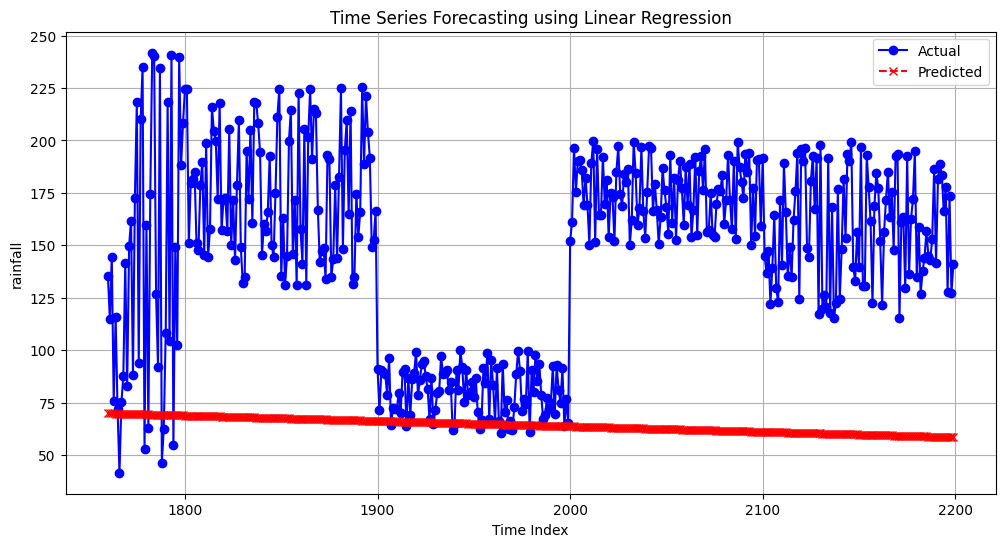

Mean Squared Error: 8998.924915140984


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import files

# Upload file
uploaded = files.upload()

# Load the dataset
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

# Display basic info about dataset
print(df.info())
print(df.head())

# Automatically create a time index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date')
    df.set_index('Date', inplace=True)
else:
    df['Time_Index'] = np.arange(len(df))
    df.set_index('Time_Index', inplace=True)

# Select target column (choosing a numerical column for regression)
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) == 0:
    raise ValueError("No numerical column found for regression.")

target_column = numeric_cols[-1]  # Choosing last numerical column as target

# Splitting dataset into features (X) and target (y)
X = np.arange(len(df)).reshape(-1, 1)  # Using index as a proxy for time
y = df[target_column].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index[len(X_train):], y_test, label='Actual', marker='o', color='blue')
plt.plot(df.index[len(X_train):], y_pred, label='Predicted', linestyle='dashed', marker='x', color='red')
plt.xlabel('Time Index' if 'Date' not in df.columns else 'Date')
plt.ylabel(target_column)
plt.title('Time Series Forecasting using Linear Regression')
plt.legend()
plt.grid()
plt.show()

# Model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
